## Analyze A/B Test Results
By Tomeka Pena


## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

#####
`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. 

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


**Answer:** There are a total of 69889 rows in the dataset.

`c)` The proportion of users converted.  

In [6]:
converted_rows = df.query('converted == 1')
converted_rows.sum()

country      USUSUSUKUSUSUSUSUSUSUKUKUSUSUSUSUSUSUSUKUSCAUK...
group        treatmentcontroltreatmentcontrolcontrolcontrol...
converted                                                 9119
dtype: object

**Answer** The results show that 9119 users are converted.

`d)` Do any of the rows have missing values? 

In [8]:
df.isnull().sum()

country      0
group        0
converted    0
dtype: int64

**Answer:** The zeros showing indicates that there are 0 null or missing values.

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [9]:
# number of visitors from each country - pull the necessary code from the next cell to provide just the counts
df['country'].value_counts()

US    48850
UK    17551
CA     3488
Name: country, dtype: int64

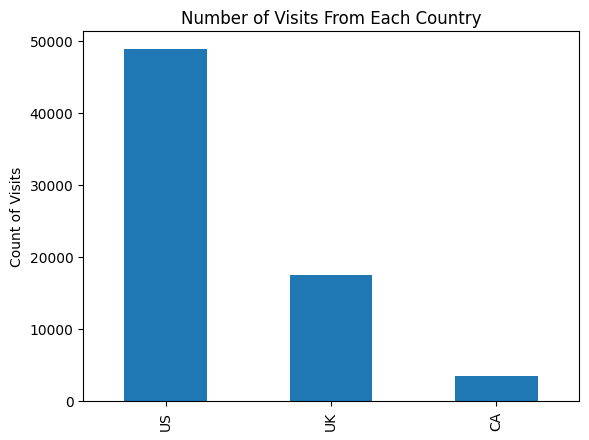

In [10]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? 

In [13]:
df.dtypes

country      object
group        object
converted     int64
dtype: object

**Answer:** The only column that is not categorical is 'converted'.

`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 


In [18]:
possible_values = df['converted'].value_counts()
print(possible_values)

0    60770
1     9119
Name: converted, dtype: int64


**Answer:** The possible values of the converted column are 1 and 0. A value of 'true' is represented by the number 1 and a value of 'false' is represented by the number 0. Yes, it makes sense that these values are the only possible values because there are only 2 possible answers to the question whether or not a user has converted.

<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [14]:
# Count the number of 1s for converted
count_ones = df['converted'].sum()

# Total number of elements in the column 'converted'
total_in_converted = df['converted'].count()

# Calculate the probability of 1 for converted
probability_of_one = count_ones / total_in_converted

print(f'Probability of an individual to convert: {probability_of_one:.4f}')

Probability of an individual to convert: 0.1305


`b)` Given that an individual was in the `control` group, what is the probability they converted? 

In [5]:
df.query('group == "control"')['converted'].mean()

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [12]:
df.query('group == "treatment"')['converted'].mean()

0.15532078043793132

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

**Answer:** Yes, by 0.05 or 5% (0.1553 - 0.1053 = 0.05)

`e)` What is the probability that an individual was in the `treatment`?

In [15]:
# Count the number individuals in treatment
count_treatment = (df['group'] == 'treatment').sum()

# Total number of elements in the column 'group'
total_in_group = df['group'].count()

# Calculate the probability of individuals in treatment
probability_of_treatment = count_treatment / total_in_group

print(f'Probability of an individual in treatment: {probability_of_treatment:.4f}')

Probability of an individual in treatment: 0.5038


`f)` What is the probability that an individual was from Canada `CA`?

In [16]:
# Count the number individuals from Canada
count_canada = (df['country'] == 'CA').sum()

# Total number of elements in the column 'country'
total_in_country = df['country'].count()

# Calculate the probability of individuals from Canada
probability_of_canada = count_canada / total_in_country

print(f'Probability of an individual from Canada: {probability_of_canada:.4f}')

Probability of an individual from Canada: 0.0499


`g)` Given that an individual was in the `US`, what was the probability that they `converted`?

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [17]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [19]:
df.query('country == "UK"')['converted'].mean()

0.12512107572218106

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

**Answer:** There is a difference of ~0.0077, which is not a significant difference to see evidence that the converted rate differs from the US to the UK.

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [3]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [4]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       | 10.2%          |  9.4%          |
| Treatment   | 15.8%       | 14.9%          |  15.4%          |

**Answer:** No, it does not appear that there could be an interaction between how country and treatment impact conversion, because the conversion rates are within 1% of each other which is a not a large enough difference to make an impact.

In [5]:
# Calculate conversion rates for UK
df.query('country == "UK"').groupby('group')['converted'].mean()

group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

In [6]:
# Calculate Conversion rates for CA
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. <br>

* Use a sample size for each page equal to the ones in `df`.  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  


`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset.

In [10]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

print(f'p_control_treatment_null: {p_control_treatment_null}')
print(f'n_treatment: {n_treatment}')
print(f'n_control: {n_control}')

p_control_treatment_null: 0.13047832992316388
n_treatment: 35211
n_control: 34678


`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [9]:
# Simulate Treatment Conversions
treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment).tolist()

print(treatment_converted)

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [11]:
# Simulate n_control transactions with a convert rate of p_control_treatment_null
control_converted = np.random.binomial(1, p_control_treatment_null, n_control).tolist()

print(control_converted)

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [22]:
# Calculate Ptreatment - Pcontrol estimate for under the null
p_treatment = np.mean(treatment_converted)
p_control = np.mean(control_converted)

p_estimate = p_treatment - p_control

print(f'p_treatment: {p_treatment}')
print(f'p_control: {p_control}')
print(f'p_estimate (p_treatment - p_control): {p_estimate}')

p_treatment: 0.13177700150521143
p_control: 0.13472518599688563
p_estimate (p_treatment - p_control): -0.002948184491674194


`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [23]:
# Simulate 500 p_treatment - p_control values
p_diffs = []

for _ in range(500):
    # simulate the treatment and control converted arrays
    treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment).tolist()
    control_converted = np.random.binomial(1, p_control_treatment_null, n_control).tolist()
    
    # calculate p_treatment and p_control under the null
    p_treatment = np.mean(treatment_converted)
    p_control = np.mean(control_converted)
    
    # calculate the difference between p_treatment_null and p_control_null
    p_diff = p_treatment - p_control
    
    # add p_diff to the p_diffs array
    p_diffs.append(p_diff)

# Convert the list to a numpy array
p_diffs = np.array(p_diffs)

print(p_diffs)

[-2.86170134e-03  1.91954764e-03  2.41064501e-03 -3.62236899e-03
 -3.80853872e-03  1.94658427e-03  2.29748066e-03 -3.90770771e-03
 -1.92364822e-03  2.77109058e-03  1.34630520e-03 -2.50693041e-03
  1.64694881e-03  1.52017155e-03 -1.90354171e-03  1.09329529e-03
  5.81245412e-04  3.40858116e-03 -1.32593416e-03  6.28046802e-03
  1.97020990e-03  4.27324645e-03  2.39051147e-03 -4.94277429e-03
 -1.27483539e-03 -1.83405544e-03  2.03486752e-03  2.10269537e-04
  3.95080433e-03  4.68964645e-03  2.97297469e-03 -6.45638507e-04
 -3.75631715e-04 -6.86261020e-04 -3.13539104e-04  4.42572378e-03
 -1.23287632e-03 -1.57190584e-03  4.61317601e-03  3.37622532e-03
 -2.57464361e-03  3.90232462e-03 -1.20927772e-03  2.41779379e-04
 -4.88201823e-03  3.11650560e-05 -2.00884887e-03  2.85582769e-03
  3.02322746e-03  4.68544596e-04 -4.31995636e-04  5.60500102e-03
 -3.00108335e-03  5.87356560e-04 -1.78644876e-03  2.94934907e-03
 -3.24225342e-03 -5.81265067e-03 -1.98304069e-03  1.73253192e-03
 -5.43413946e-04 -1.94290

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

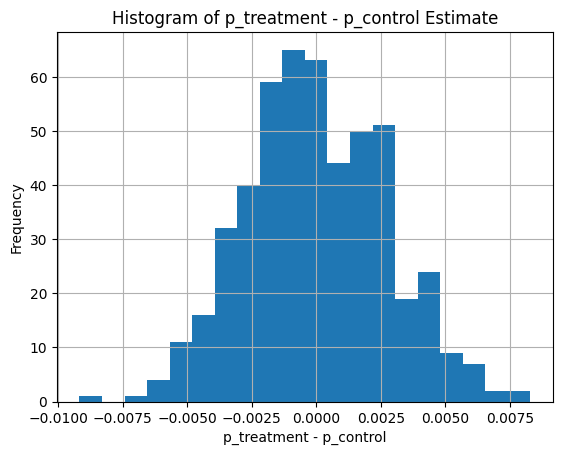

In [24]:
# Plot the histogram
p_diffs = pd.Series(p_diffs)
p_diffs.hist(bins=20)

plt.xlabel('p_treatment - p_control')
plt.ylabel('Frequency')
plt.title('Histogram of p_treatment - p_control Estimate')
plt.show()

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [26]:
# Calculate the observed difference in df
observed_treatment = df.query('group == "treatment"')['converted'].mean()
observed_control = df.query('group == "control"')['converted'].mean()
observed_diff = observed_treatment - observed_control

print(f'Observed treatment mean: {observed_treatment}')
print(f'Observed control mean: {observed_control}')
print(f'Observed difference: {observed_diff}')

Observed treatment mean: 0.15532078043793132
Observed control mean: 0.1052540515600669
Observed difference: 0.050066728877864425


In [27]:
# Calculate the proportion of p_diffs greater than the observed difference
p_diffs_series = pd.Series(p_diffs)
proportion_greater_than_observed = (p_diffs_series > observed_diff).mean()

print(f'Proportion of p_diffs greater than observed difference: {proportion_greater_than_observed}')

Proportion of p_diffs greater than observed difference: 0.0


`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

**Answer:** In part g, I computed the proportion of simulated differences (Ptreatment - Pcontrol) that were greater than the observed difference between the treatment and control groups in the original dataset. This value is known as the p-value in scientific studies. The p-value helps to determine the significance of the observed difference. If the p-value is less than the Type I error rate of 0.05, it indicates that there is a statistically significant difference between the new and old pages, and the null hypothesis is rejected. Conversely, if the p-value is greater than 0.05, the null hypothesis is not rejected, suggesting that the observed difference could be due to random chance and is not statistically significant. 

A p-value of 0 means that none of the simulated differences were greater than the observed difference. Since the p-value is less than the common significance level of 0.05, the null hypothesis is rejected. This indicates that there is a statistically significant difference between the new and old pages, suggesting that the observed difference is unlikely to have occurred by random chance alone. Therefore, I conclude based on the evidence, that the new page performs differently than the old page and has a better conversion.

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** The appropriate type of regression to use in this case is logistic regression, because logistic regression is used when the dependent variable is binary or has it has two possible outcomes, such as conversion or no conversion.

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): 

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [3]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. 

In [12]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 


In [13]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. 

In [14]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                0.007175
Time:                        03:13:05   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

**Answer:** The p-value associated with ab_page is 0.000, and it does lead to the same conclusion drawn in the experiment section which also resulted with a p-value of 0.

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [15]:
### Create the necessary dummy variables
df['US'] = pd.get_dummies(df['country'])['US']
df['UK'] = pd.get_dummies(df['country'])['UK']
print("\nDataFrame with US and UK Dummy Variables:")
df.head()


DataFrame with US and UK Dummy Variables:


,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,0,0,1
1,US,treatment,1,1,1,1,0
2,UK,treatment,0,1,1,0,1
3,UK,control,0,1,0,0,1
4,UK,treatment,0,1,1,0,1


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [20]:
# Define the X matrix and y response column
X = df[['intercept', 'ab_page', 'US', 'UK']]
y = df['converted']

# Display the dataframe
print("DataFrame with Dummy Variables:")
print(df.head())

# Display X matrix
print("\nX Matrix:")
print(X.head())

# Display y response column
print("\nY Response Column:")
print(y.head())

DataFrame with Dummy Variables:
  country      group  converted  intercept  ab_page  US  UK
0      UK    control          0          1        0   0   1
1      US  treatment          1          1        1   1   0
2      UK  treatment          0          1        1   0   1
3      UK    control          0          1        0   0   1
4      UK  treatment          0          1        1   0   1

X Matrix:
   intercept  ab_page  US  UK
0          1        0   0   1
1          1        1   1   0
2          1        1   0   1
3          1        0   0   1
4          1        1   0   1

Y Response Column:
0    0
1    1
2    0
3    0
4    0
Name: converted, dtype: int64


`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 


In [17]:
# Logit Model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


`d)` Provide the summary of your model below.

In [19]:
# Print the model summary
print(logit_result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                0.007312
Time:                        03:56:34   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
US             0.0727      0.053      1.372      0.1

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

**Answer:** The p-values associated with the US and UK dummy variables in the logistic regression model provide insights into the statistical significance of these variables' impact on conversion rates. In this context, a lower p-value of less than 0.05 would indicate strong evidence against the null hypothesis, suggesting that the variable significantly impacts the dependent variable, which is the conversion rate in this case.

For the US variable, the p-value is 0.170. This value is above the common significance level threshold of 0.05, indicating that there is not enough statistical evidence to conclude that being from the US significantly affects the probability of conversion compared to the baseline category, Canada. Therefore, while there may be some effect, the evidence is not strong enough to be considered statistically significant at the 5% level.

Additionally, for the UK variable, the p-value is 0.905, which is much higher than 0.05. This suggests that there is even weaker evidence to support that being from the UK has a significant impact on the conversion rate compared to the baseline category of Canada. The very high p-value implies that the conversion rate for users from the UK is statistically indistinguishable from that of users from Canada.

In summary, the p-values for US (0.170) and UK (0.905) suggest that there is no statistically significant difference in conversion rates between users from the US or the UK compared to the baseline category of Canada. Thus, we cannot confidently assert that the country of origin impacts the likelihood of conversion in this dataset.